In [38]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [6]:
json_file = Path("../data/processed/model_performance_top1_pre_quali.json")  # replace with your file path
with open(json_file, "r") as f:
    data = json.load(f)

In [17]:
rows = []
for dataset, models in data.items():
    for model, metrics in models.items():
        rows.append({
            "dataset": dataset,
            "model": model,
            **metrics
        })
df_prequali = pd.DataFrame(rows)

In [18]:
json_file = Path("../data/processed/model_performance_top1_quali.json")
with open(json_file, "r") as f:
    data = json.load(f)

In [19]:
rows = []
for dataset, models in data.items():
    for model, metrics in models.items():
        rows.append({
            "dataset": dataset,
            "model": model,
            **metrics
        })
df_quali = pd.DataFrame(rows)

In [20]:
df_delta = df_quali.set_index(['dataset','model']) - df_prequali.set_index(['dataset','model'])
df_delta = df_delta.reset_index()

In [8]:
df['dataset_order'] = df['dataset'].str.split('-').str[0].astype(int)
df = df.sort_values(['dataset_order', 'model'])

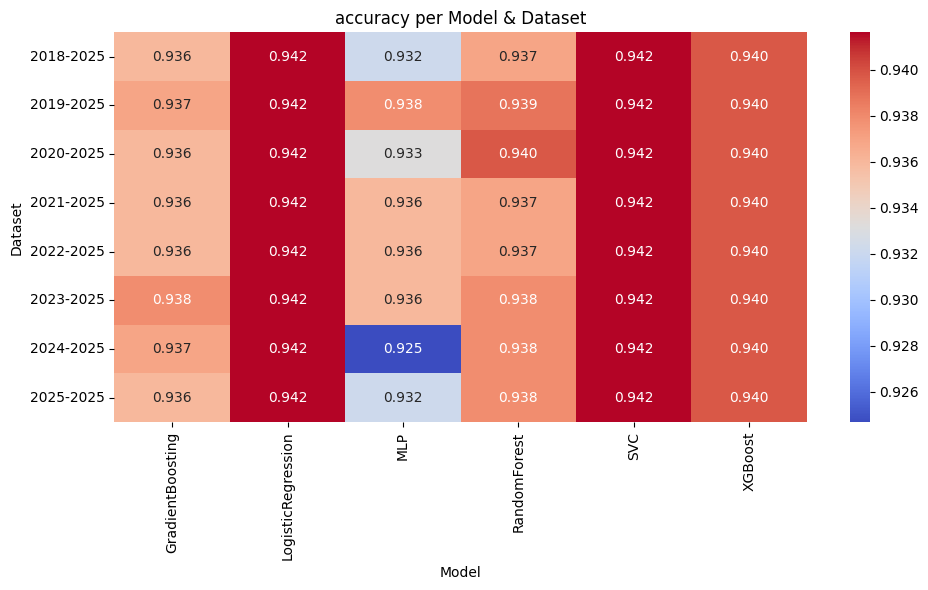

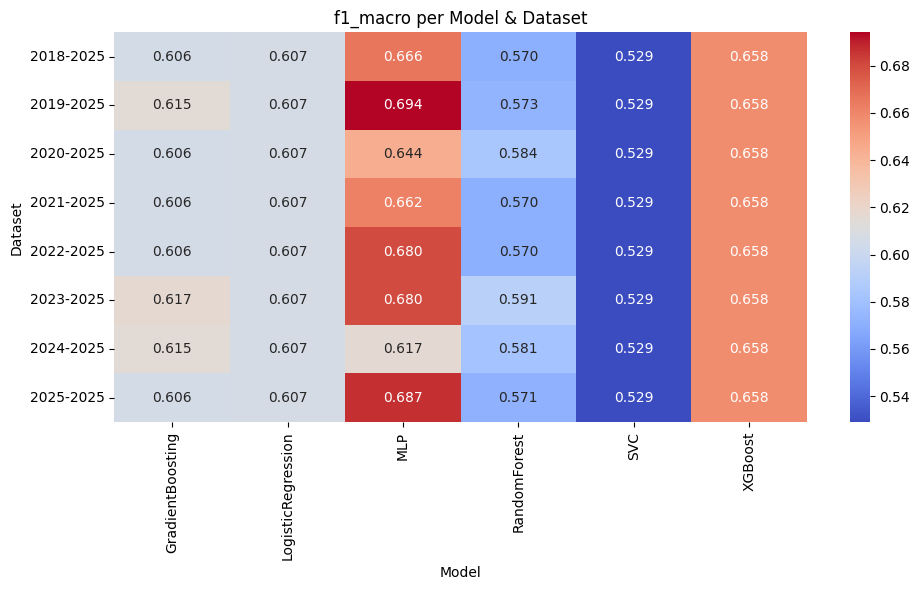

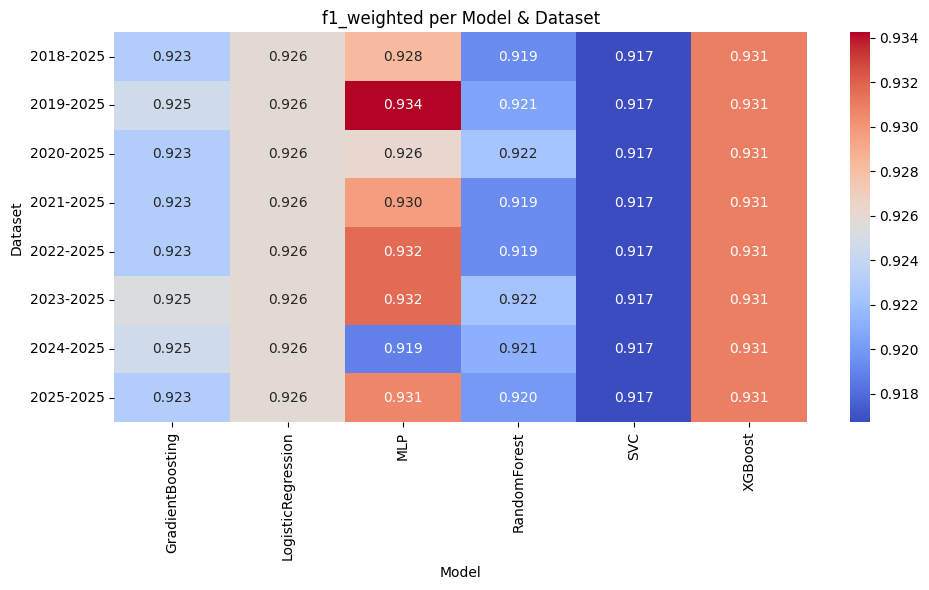

In [11]:
metrics = ['accuracy', 'f1_macro', 'f1_weighted']
for metric in metrics:
    pivot = df.pivot(index='dataset', columns='model', values=metric)
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap='coolwarm')
    plt.title(f"{metric} per Model & Dataset")
    plt.ylabel("Dataset")
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()

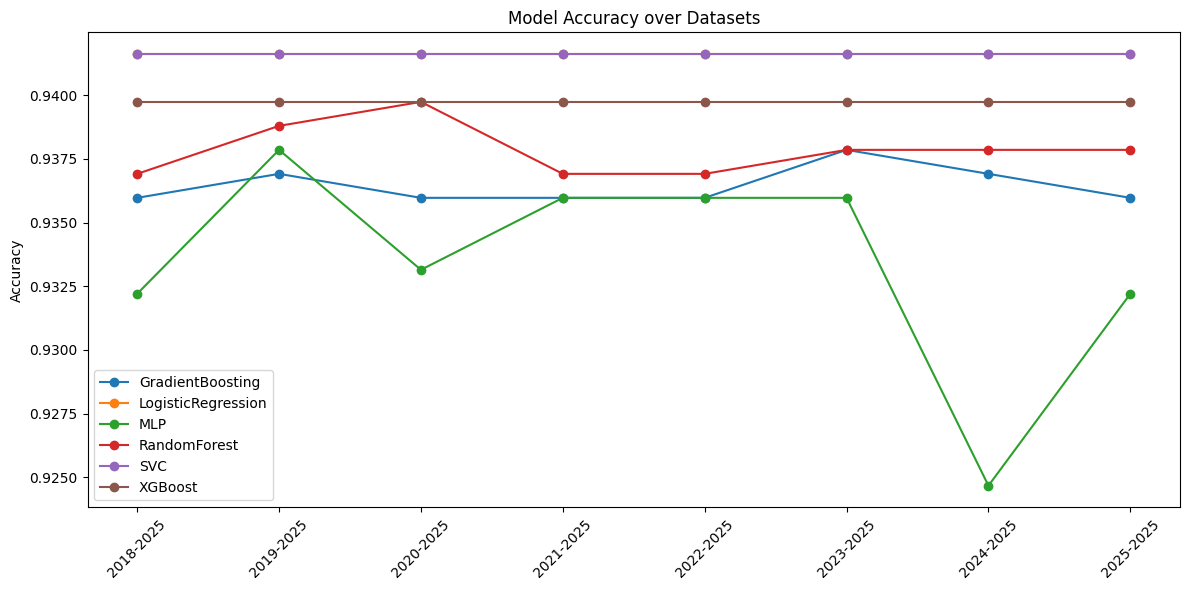

In [12]:
plt.figure(figsize=(12,6))
for model in df['model'].unique():
    subset = df[df['model'] == model]
    plt.plot(subset['dataset'], subset['accuracy'], marker='o', label=model)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Datasets")
plt.legend()
plt.tight_layout()
plt.show()

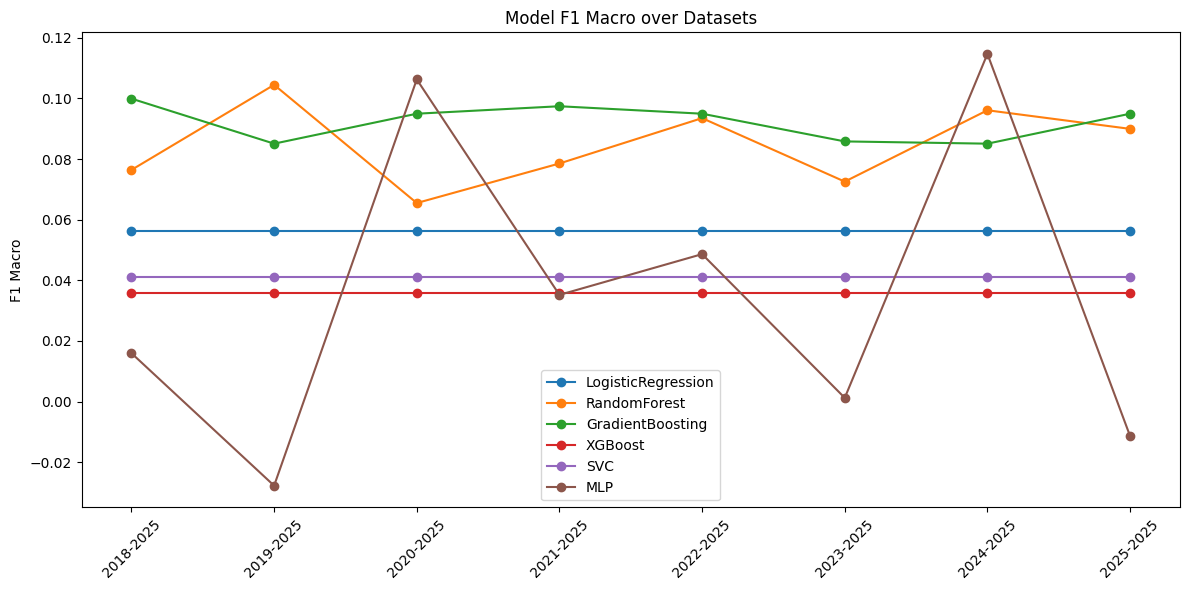

In [23]:
plt.figure(figsize=(12,6))
for model in df_delta['model'].unique():
    subset = df_delta[df_delta['model'] == model]
    plt.plot(subset['dataset'], subset['f1_macro'], marker='o', label=model)
plt.xticks(rotation=45)
plt.ylabel("F1 Macro")
plt.title("Model F1 Macro over Datasets")
plt.legend()
plt.tight_layout()
plt.show()

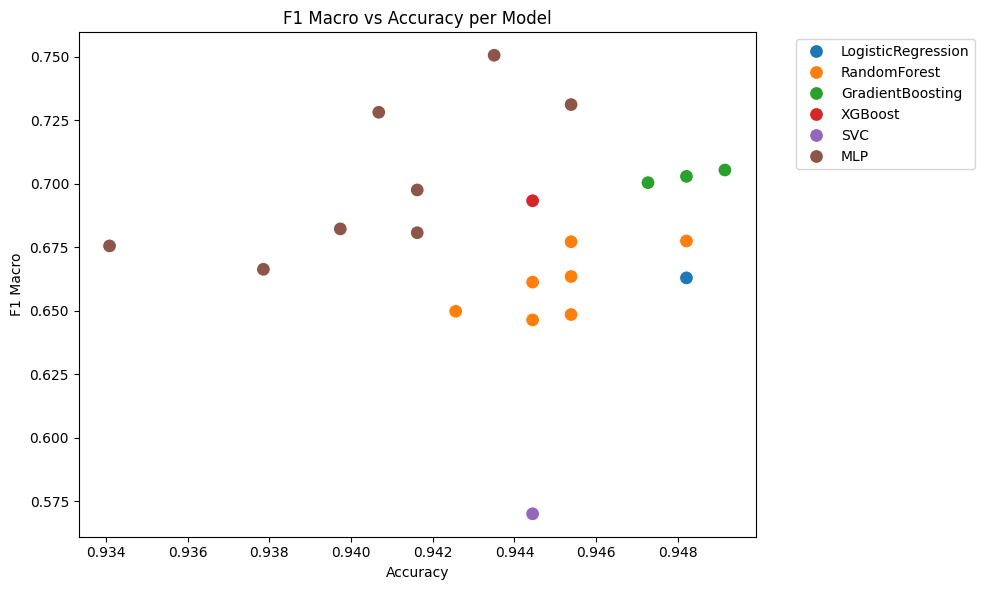

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_quali, x='accuracy', y='f1_macro', hue='model', s=100)
plt.title("F1 Macro vs Accuracy per Model")
plt.xlabel("Accuracy")
plt.ylabel("F1 Macro")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Josep\AppData\Local\Temp\ipykernel_22028\1134592133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_subset, x='model', y=metric, palette="viridis")


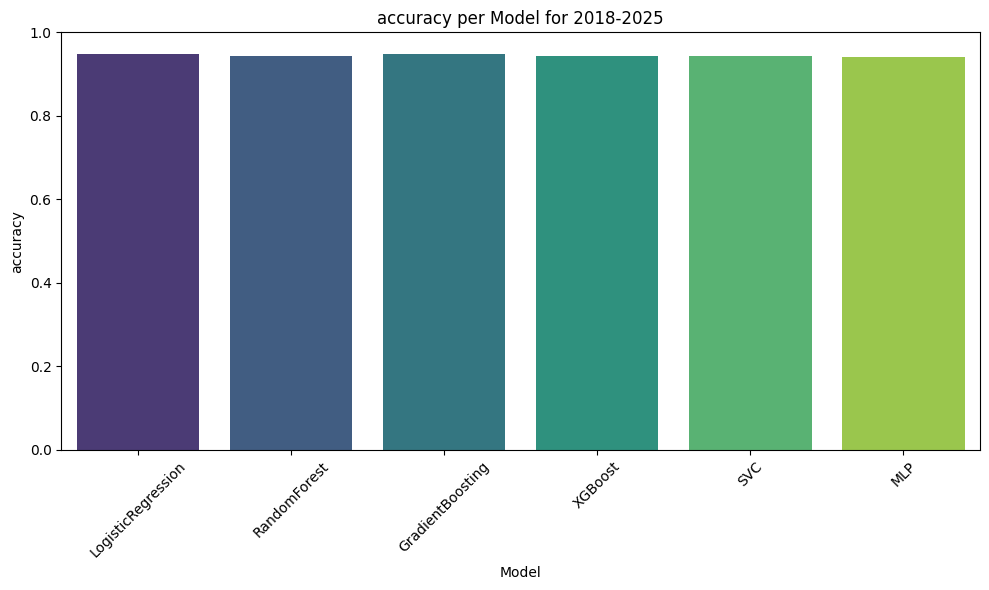

C:\Users\Josep\AppData\Local\Temp\ipykernel_22028\1134592133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_subset, x='model', y=metric, palette="viridis")


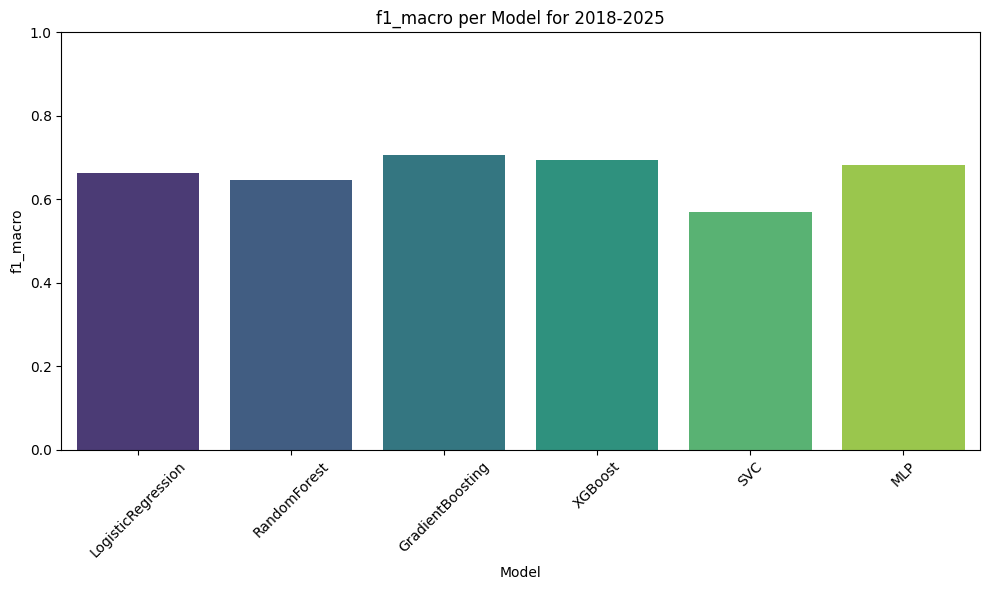

C:\Users\Josep\AppData\Local\Temp\ipykernel_22028\1134592133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_subset, x='model', y=metric, palette="viridis")


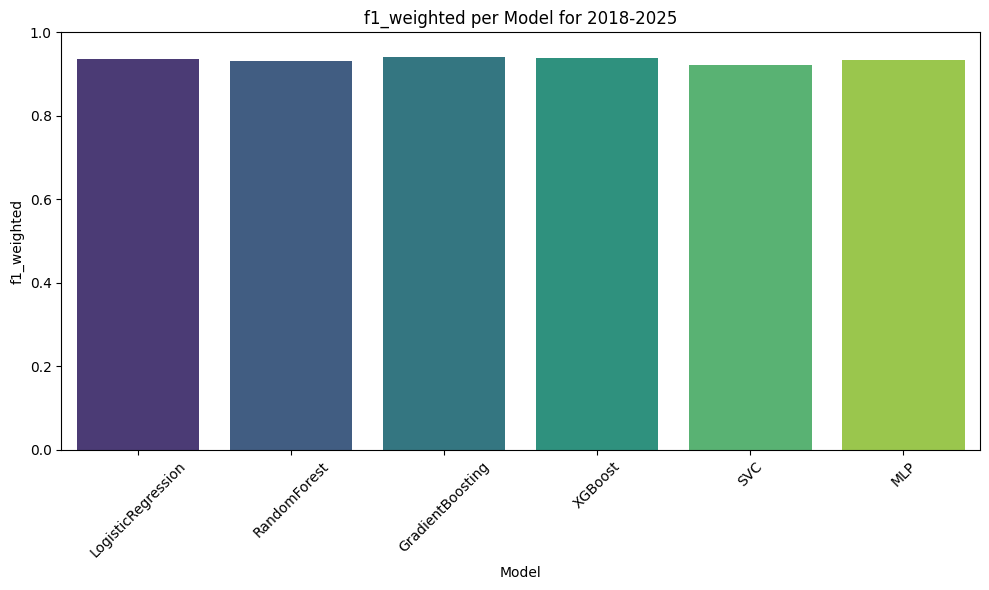

In [27]:
dataset_to_plot = "2018-2025"
df_subset = df_quali[df_quali["dataset"] == dataset_to_plot]
metrics = ['accuracy', 'f1_macro', 'f1_weighted']
for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_subset, x='model', y=metric, palette="viridis")
    plt.title(f"{metric} per Model for {dataset_to_plot}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

C:\Users\Josep\AppData\Local\Temp\ipykernel_22028\2195525296.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merge, x='model', y='accuracy_delta', palette="coolwarm")


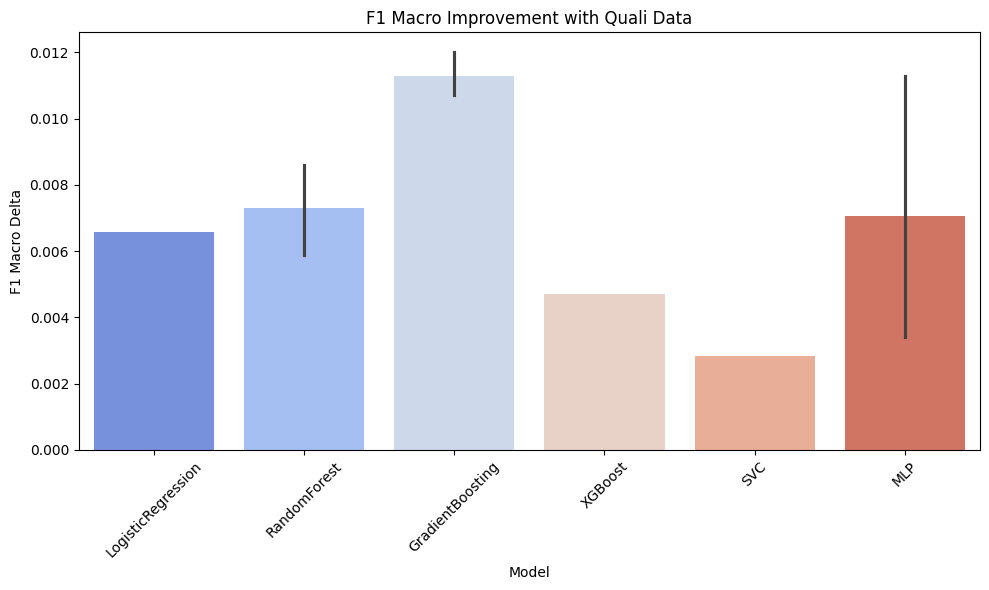

In [ ]:
df_merge = df_prequali.merge(df_quali, on=['dataset','model'], suffixes=('_pre','_quali'))

for metric in metrics:
    df_merge[f'{metric}_delta'] = df_merge[f'{metric}_quali'] - df_merge[f'{metric}_pre']

plt.figure(figsize=(10,6))
sns.barplot(data=df_merge, x='model', y='accuracy_delta', palette="coolwarm")
plt.title("Accuracy Improvement with Quali Data")
plt.ylabel("Accuracy Delta")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
feature_importances = np.load("../models/top1/pre-quali/2025-2025_top1_pre-quali_GradientBoosting_feature_importance.npy")
df = pd.read_csv("../data/processed/features_pre_race_2018-2025.csv")
X = df.drop(columns=[
    "Position", "grid_position", "is_top10_start",
    "grid_vs_team_avg", "driver_vag_quali_last5",
    "team_avg_quali_last_5"
], errors="ignore")
feature_names = X.columns
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
}).sort_values(by="importance", ascending=False)

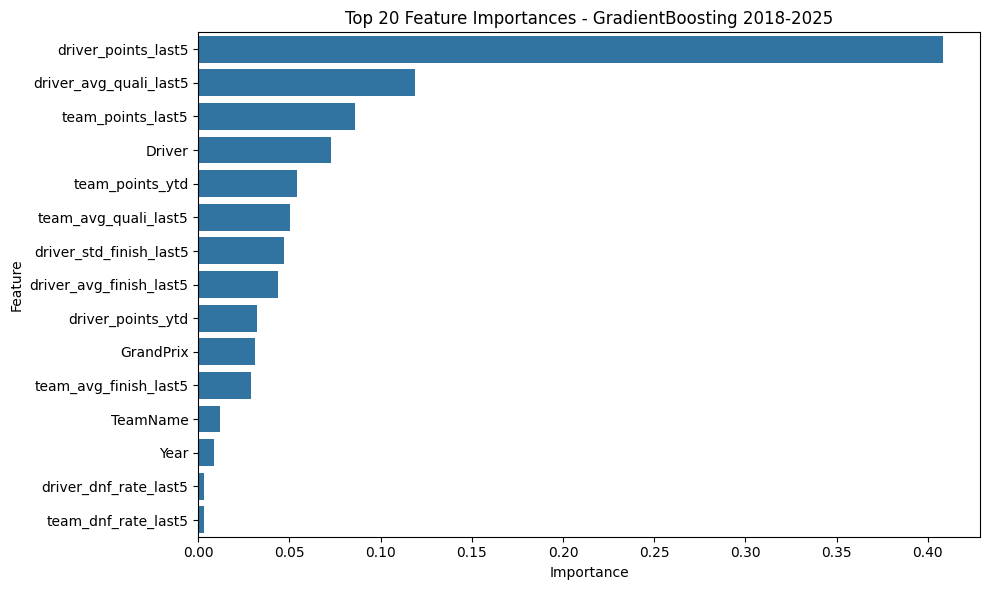

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=fi_df.head(20))
plt.title("Top 20 Feature Importances - GradientBoosting 2018-2025")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [61]:
feature_importances = np.load("../models/top1/quali/2025-2025_top1_quali_GradientBoosting_feature_importance.npy")
df = pd.read_csv("../data/processed/features_pre_race_2018-2025.csv")
X = df.drop(columns=[
    "Position"
], errors="ignore")
feature_names = X.columns
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
}).sort_values(by="importance", ascending=False)

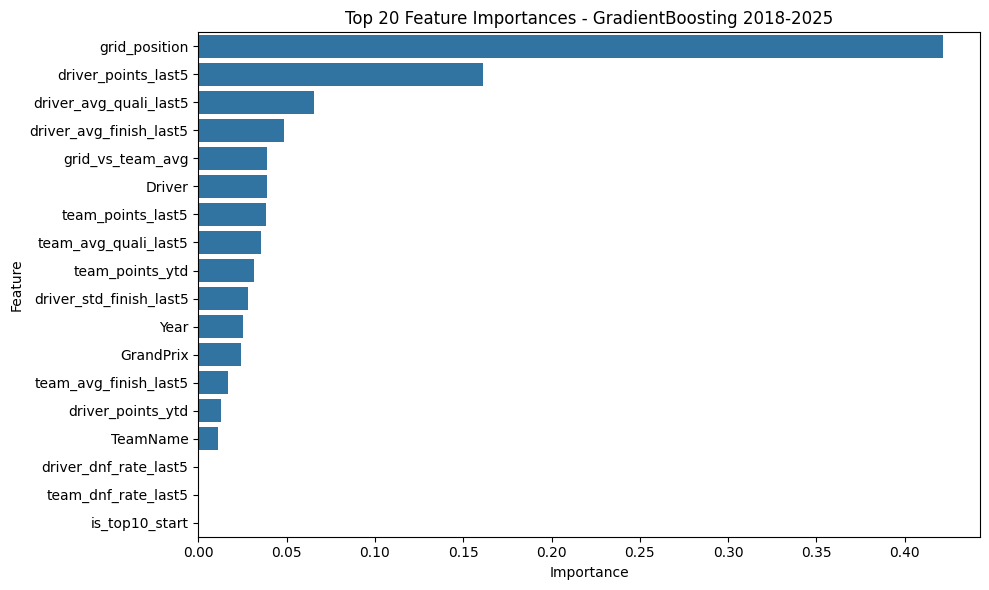

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=fi_df.head(20))
plt.title("Top 20 Feature Importances - GradientBoosting 2018-2025")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()